<a href="https://colab.research.google.com/github/onlookertozip/Day20180528/blob/master/Level1415_%EC%83%81%EA%B4%80%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame({"v1":[100,200,300,400], "v2":[400,200,100,250], "v3":[40,60,60,100]})

In [0]:
corr = df.corr(method = 'pearson')

In [0]:
corr

,v1,v2,v3
v1,1.000000,-0.568038,0.923381
v2,-0.568038,1.000000,-0.291397
v3,0.923381,-0.291397,1.000000


In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns

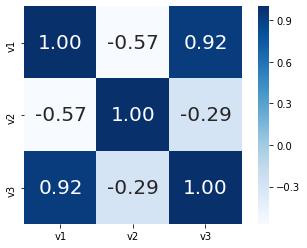

In [0]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

In [0]:
import pandas as pd
from pandas import Series, DataFrame

df=DataFrame([
	[3000,2000,3200,2100],
	[2000,1700,2600, 1800],
	[1500,2000,1500,13000]
])
print(df)

      0     1     2      3
0  3000  2000  3200   2100
1  2000  1700  2600   1800
2  1500  2000  1500  13000


In [0]:
df=df.T
df

,0,1,2
0,3000,2000,1500
1,2000,1700,2000
2,3200,2600,1500
3,2100,1800,13000


In [0]:
df.columns=['Google','Naver','Daum']
df

,Google,Naver,Daum
0,3000,2000,1500
1,2000,1700,2000
2,3200,2600,1500
3,2100,1800,13000


In [0]:
print(df.corr())

          Google     Naver      Daum
Google  1.000000  0.866618 -0.551247
Naver   0.866618  1.000000 -0.400942
Daum   -0.551247 -0.400942  1.000000


In [0]:
print(df['Daum'].corr(df['Naver']))

-0.40094216130654803


In [0]:

print(df.Daum.corr(df['Naver']))

-0.40094216130654803


In [0]:
from scipy import stats
des=stats.linregress(df.Google, df.Naver)
print(des)

LinregressResult(slope=0.5698447893569845, intercept=557.6496674057651, rvalue=0.8666176836199425, pvalue=0.13338231638005746, stderr=0.23200153187633407)


In [0]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df.Google, df.Naver)
print("구글이 5000일때 네이버의 값 예측 : ", 5000*slope + intercept)

구글이 5000일때 네이버의 값 예측 :  3406.8736141906875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  """


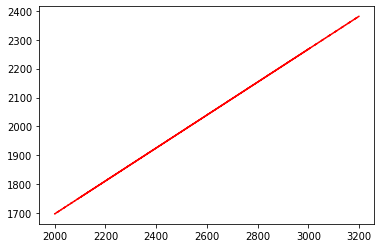

In [0]:
from scipy import polyval
import matplotlib as plt
from pylab import plot,title,show,legend

ry=polyval([slope, intercept],df['Google'])
plot(df.Google, ry, 'r--')
show()

In [0]:
import numpy as np

import pandas as pd

from pandas import DataFrame



# making DataFrame with 4 random variables

np.random.seed(123) # for reproducibility

df= DataFrame(np.random.randn(10, 4), 

                    columns=['a', 'b', 'c', 'd'])

# setting index with 2 group, 'grp1' and 'grp2'

df['group'] = ['grp1', 'grp1', 'grp1', 'grp1', 'grp1', 

                  'grp2', 'grp2', 'grp2', 'grp2', 'grp2']



df = df.set_index('group')

df

,a,b,c,d
group,,,,
grp1,-1.085631,0.997345,0.282978,-1.506295
grp1,-0.578600,1.651437,-2.426679,-0.428913
grp1,1.265936,-0.866740,-0.678886,-0.094709
grp1,1.491390,-0.638902,-0.443982,-0.434351
grp1,2.205930,2.186786,1.004054,0.386186
grp2,0.737369,1.490732,-0.935834,1.175829
grp2,-1.253881,-0.637752,0.907105,-1.428681
grp2,-0.140069,-0.861755,-0.255619,-2.798589
grp2,-1.771533,-0.699877,0.927462,-0.173636


In [0]:
# correlation with columns: corrwith()
corr_with_d = lambda x: x.corrwith(x['d'])
grouped = df.groupby('group')
grouped.apply(corr_with_d) 

,a,b,c,d
group,,,,
grp1,0.846822,0.099417,0.089205,1.0
grp2,0.307477,0.832473,-0.390469,1.0


In [0]:
# inter-column correlation: corr()
corr_a_d = lambda g: g['a'].corr(g['d'])
grouped = df.groupby('group')
DataFrame(grouped.apply(corr_a_d))

,0
group,
grp1,0.846822
grp2,0.307477


In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()
diabetes.DESCR 

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [0]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [0]:
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [0]:
# Make a DataFrame of Y ('target')
diabetes_Y = pd.DataFrame(diabetes.target, columns = ['target'])
diabetes_Y[:5]

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [0]:
# Make a DataFrame of X with age, sex, bmi

diabetes_X = pd.DataFrame(diabetes.data[:, 0:3], 

                          columns = ['age', 'sex', 'bmi']) # age, sex, bmi
diabetes_X[:5]

,age,sex,bmi
0,0.038076,0.050680,0.061696
1,-0.001882,-0.044642,-0.051474
2,0.085299,0.050680,0.044451
3,-0.089063,-0.044642,-0.011595
4,0.005383,-0.044642,-0.036385


In [0]:
diabetes_df = pd.concat([diabetes_Y, diabetes_X], axis=1)
diabetes_df[:5]

,target,age,sex,bmi
0,151.0,0.038076,0.050680,0.061696
1,75.0,-0.001882,-0.044642,-0.051474
2,141.0,0.085299,0.050680,0.044451
3,206.0,-0.089063,-0.044642,-0.011595
4,135.0,0.005383,-0.044642,-0.036385


In [0]:
diabetes_df['grp'] = np.where(diabetes_df['sex'] > 0, 'M', 'F')
diabetes_df.drop(columns=['sex'], inplace=True) 
diabetes_df[:3]

,target,age,bmi,grp
0,151.0,0.038076,0.061696,M
1,75.0,-0.001882,-0.051474,F
2,141.0,0.085299,0.044451,M


In [0]:
# UDF of linear regression model
def lin_regress(data, yvar, xvars):
    # output, input variables
    Y = data[yvar]
    X = data[xvars]   

    # Create linear regression object
    linreg = linear_model.LinearRegression()   

    # Fit the linear regression model
    model = linreg.fit(X, Y)   

    # Get the intercept and coefficients
    intercept = model.intercept_
    coef = model.coef_
    result = [intercept, coef]    

    return result

In [0]:
# GroupBy
grouped = diabetes_df.groupby('grp')
# Apply the UDF of linear regression model by Group
lin_reg_coef = grouped.apply(lin_regress, 'target', ['age', 'bmi'])

In [0]:
lin_reg_coef

grp
F    [152.40684676047456, [23.199210147823965, 814....
M    [148.21507864445124, [291.7563226838976, 1092....
dtype: object

In [0]:
lin_reg_coef['M']

[148.21507864445124, array([ 291.75632268, 1092.80118705])]

In [0]:
lin_reg_coef['F']

[152.40684676047456, array([ 23.19921015, 814.50932703])]

In [0]:
import numpy as np
import pandas as pd

# making groups
group_1 = ['A', 'B']*20
group_2 = ['C', 'D', 'E', 'F']*10
group_3 = ['G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']*5;

In [0]:
df = pd.DataFrame({'group_1': group_1, 
                   'group_2': group_2,
                   'group_3': group_3,
                   'col_1': np.random.randn(40), 
                   'col_2': np.random.randn(40), 
                   'col_3': np.random.randn(40), 
                   'col_4': np.random.randn(40)})

df.sort_values(by=['group_1', 'group_2', 'group_3'], axis=0)

,group_1,group_2,group_3,col_1,col_2,col_3,col_4
0,A,C,G,-0.805367,1.255237,-0.275786,0.020316
8,A,C,G,0.978736,2.087113,0.474347,0.079227
16,A,C,G,0.890706,-1.084568,-0.548955,0.307384
24,A,C,G,1.417299,-0.024626,0.556549,-0.548642
32,A,C,G,1.162204,-0.735217,-1.411889,0.199582
4,A,C,K,0.338589,-0.314758,1.608691,0.665653
12,A,C,K,1.743712,0.181035,-0.756437,-0.740814
20,A,C,K,-0.772709,0.642055,-0.823431,0.093461
28,A,C,K,-1.198301,0.426147,-0.239669,-0.354824
36,A,C,K,-0.403366,-1.370948,0.553856,-0.269293


In [0]:
# a user-defined function of correlation coefficients with paired variables by groups
def corr_group(df, var_1, var_2, group_list):
    # correlaiton fuction with 2 variables
    corr_func = lambda g: g[var_1].corr(g[var_2])    

    # GroupBy operator
    grouped = df.groupby(group_list)    

    # calculate correlation coefficient by Group
    corr_coef_df = pd.DataFrame(grouped.apply(corr_func), columns=['corr_coef'])    

    # add var_1, var_2 column names
    corr_coef_df['var1'] = var_1
    corr_coef_df['var2'] = var_2    

    return corr_coef_df

In [0]:
# blank DataFrame
corr_coef_df_all = pd.DataFrame() 

# group by list
group_list = ['group_1', 'group_2', 'group_3']

# column lists for correlation matrix
col_list = ['col_1', 'col_2', 'col_3', 'col_4']

# get all cominations of col_list with length 2
from itertools import combinations
comb = combinations(col_list, 2)

# calculate correlation coefficients pair-wise
for var in list(comb):
    corr_tmp = corr_group(df, var[0], var[1], group_list)
    corr_coef_df_all = corr_coef_df_all.append(corr_tmp)

# result
corr_coef_df_all[['var1', 'var2', 'corr_coef']]

var1   var2  corr_coef
group_1 group_2 group_3                         
A       C       G        col_1  col_2  -0.405093
                K        col_1  col_2  -0.073014
        E       I        col_1  col_2  -0.523021
                M        col_1  col_2  -0.749885
B       D       H        col_1  col_2  -0.157439
                L        col_1  col_2  -0.950722
        F       J        col_1  col_2   0.702093
                N        col_1  col_2   0.013829
A       C       G        col_1  col_3   0.078603
                K        col_1  col_3  -0.011486
        E       I        col_1  col_3   0.977604
                M        col_1  col_3  -0.369609
B       D       H        col_1  col_3   0.572452
                L        col_1  col_3  -0.064934
        F       J        col_1  col_3   0.196997
                N        col_1  col_3   0.630869
A       C       G        col_1  col_4  -0.216008
                K        col_1  col_4  -0.261265
        E       I        col_1  col_4  -0.168106
                M        col_1  col_4   0.778924
B       D       H        col_1  col_4  -0.250431
                L        col_1  col_4   0.605109
        F       J        col_1  col_4  -0.272749
                N        col_1  col_4   0.431610
A       C       G        col_2  col_3   0.604916
                K        col_2  col_3  -0.611702
        E       I        col_2  col_3  -0.542032
                M        col_2  col_3   0.799707
B       D       H        col_2  col_3  -0.878989
                L        col_2  col_3   0.116903
        F       J        col_2  col_3  -0.047202
                N        col_2  col_3   0.445727
A       C       G        col_2  col_4  -0.164409
                K        col_2  col_4  -0.069728
        E       I        col_2  col_4   0.341272
                M        col_2  col_4  -0.490237
B       D       H        col_2  col_4  -0.080138
                L        col_2  col_4  -0.400869
        F       J        col_2  col_4  -0.020024
                N        col_2  col_4   0.335459
A       C       G        col_3  col_4  -0.660862
                K        col_3  col_4   0.706232
        E       I        col_3  col_4   0.019252
                M        col_3  col_4   0.043919
B       D       H        col_3  col_4  -0.204683
                L        col_3  col_4   0.508671
        F       J        col_3  col_4  -0.127830
                N        col_3  col_4  -0.120086